In [6]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_best_picture"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'
response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_'
categories = [link.replace(prefix, '') for link in links]
print(categories)

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []
    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})
    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []
    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])
    return winners

with open('academy_awards_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_picture', 'best_director', 'best_leading_actress', 'best_leading_actor', 'best_supporting_actor', 'best_supporting_actress', 'best_unique_artistic', 'best_foreign_film', 'best_original_screenplay', 'best_adapted_screenplay', 'best_screenplay', 'best_story', 'best_story_screenplay', 'best_title_writing', 'best_editing', 'best_cinematography', 'best_cinematography_color', 'best_cinematography_bw', 'best_score', 'best_drama_score', 'best_comedy_score', 'best_score_adapted', 'best_score_drama_comedy', 'best_score_musical', 'best_song', 'best_song_score', 'best_assistant_director', 'best_art_direction', 'best_art_direction_color', 'best_art_direction_bw', 'best_dance_direction', 'best_costume_design', 'best_costume_design_color', 'best_costume_design_bw', 'best_makeup', 'best_sound_mixing', 'best_sound_editing', 'best_visual_effects', 'best_special_effects', 'best_engineering_effects', 'best_animated_feature', 'best_short_film_animated', 'best_documentary_feature', 'best_short_film_d

In [8]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=goldenglobes_best_picture_drama"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'
response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=goldenglobes_'
categories = [link.replace(prefix, '') for link in links]
print(categories)

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=goldenglobes_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []
    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})
    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []
    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])
    return winners

with open('golden_globes_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_picture_drama', 'best_picture_comedy', 'best_comedy', 'best_musical', 'best_director', 'best_leading_actor_drama', 'best_leading_actress_drama', 'best_leading_actor_comedy', 'best_leading_actress_comedy', 'best_motion_picture_actor', 'best_motion_picture_actress', 'best_supporting_actor', 'best_supporting_actress', 'best_motion_picture_acting_debut', 'best_motion_picture_acting_debut_female', 'most_promising_newcomer_male', 'most_promising_newcomer_female', 'most_promising_newcomer', 'best_picture_acting_debut', 'best_screenplay', 'best_cinematography_color', 'best_cinematography_black_and_white', 'best_original_score', 'best_original_song', 'best_film_promoting_international_unders', 'best_outdoor_drama', 'best_foreign_language_film', 'samuel_goldwyn_award', 'best_animated_film', 'best_documentary', 'cinematic_boxoffice_achievement', 'best_tv_series', 'best_tv_series_drama', 'best_tv_series_comedy', 'best_leading_actor_tv_series_drama', 'best_tv_series_actor', 'best_leading_act

In [16]:
import requests
from bs4 import BeautifulSoup
import csv
import datetime

def extract_data(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    posts = soup.find_all('div', class_='post-list')
    for post in posts:
        title = post.find('h2', class_='title').text.strip()
        movie_name = title.split('(')[0].strip()
        year = title.split('(')[1].replace(')', '').strip()
        cast_element = post.find('div', class_='stars')
        if cast_element:
            cast = ', '.join([actor.text.strip() for actor in cast_element.find_all('a')])
        else:
            cast = ''
        cameras_element = post.find('div', class_='cameras')
        if cameras_element:
            primary_camera = cameras_element.find('a').text.strip()
        else:
            primary_camera = ''
        csv_writer.writerow([movie_name, year, cast, primary_camera])

base_url = 'https://shotonwhat.com/{}/page/{}?view=more'

with open('movies.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Movie Name', 'Year', 'Cast', 'Primary Camera'])
    current_year = datetime.datetime.now().year
    for year in range(1980, current_year + 1):
        page_num = 1
        while True:
            url = base_url.format(year, page_num)
            extract_data(url)
            response = requests.get(url)
            if response.status_code != 200:
                break
            page_num += 1


In [19]:
import csv

with open('movies.csv', 'r', newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)
    filtered_rows = []
    for row in csv_reader:
        try:
            year = int(row[1])
            if year >= 1980:
                filtered_rows.append(row)
        except ValueError:
            continue

with open('filtered_movies.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(header)
    csv_writer.writerows(filtered_rows)

In [21]:
import csv

with open('filtered_movies.csv', 'r', newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)
    camera_rows = [row for row in csv_reader if row[3] != '']

with open('camera_movies.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(header)
    csv_writer.writerows(camera_rows)

In [2]:
import requests
from lxml import html

url = 'https://www.filmaffinity.com/ca/award-edition.php?edition-id=cannes_2022'
response = requests.get(url)
tree = html.fromstring(response.content)
movie_list = tree.xpath('//*[@id="mt-content-cell"]/div[2]/div[2]/div[1]/div[1]/div/ul/li')
movie_names = []
for movie in movie_list:
    movie_title = movie.xpath('.//a/@title')
    if movie_title:
        movie_names.append(movie_title[0])
for movie in movie_names:
    print(movie)

Triangle of Sadness 
Crimes of the Future 
Holy Spider 
Forever Young 
Tori and Lokita 
Stars at Noon 
Brother and Sister 
Close 
Armageddon Time 
Broker 
Nostalgia 
R.M.N. 
Decision to Leave 
Showing Up 
Leila’s Brothers 
Boy from Heaven 
Tchaikovsky's Wife 
EO 
Pacifiction 
Mother and Son 
The Eight Mountains 
Final Cut 
Top Gun: Maverick 
Elvis 
Three Thousand Years of Longing 
Smoking Causes Coughing 
Hunt 
The Innocent 
Mascarade 
Moonage Daydream 
November 
Rebel 


In [1]:
import pandas as pd
import os

folder_path = 'Master'
merged_movie_cameras_df = pd.read_csv(os.path.join(folder_path, "merged_movie_cameras.csv"))
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films.csv"))
merged_df = pd.merge(festivals_attended_by_films_df, merged_movie_cameras_df[['tconst', 'camera']], on='tconst', how='left')
merged_df.rename(columns={'camera': 'Camera'}, inplace=True)
output_file_path = os.path.join(folder_path, "festivals_attended_by_films_with_camera.csv")
merged_df.to_csv(output_file_path, index=False)
print("Merged CSV file with camera information created successfully.")

Merged CSV file with camera information created successfully.


In [4]:
import pandas as pd
import os

camera_movies_df = pd.read_csv("camera_movies.csv")
folder_path = 'Master'
awards_won_by_films_df = pd.read_csv(os.path.join(folder_path, "awards_won_by_films.csv"))
merged_df = pd.merge(awards_won_by_films_df, camera_movies_df[['Movie Name', 'Primary Camera']], left_on='Movie Title', right_on='Movie Name', how='left')
merged_df.drop(columns=['Movie Name'], inplace=True)
merged_df.rename(columns={'Primary Camera': 'Camera'}, inplace=True)
output_file_path = os.path.join(folder_path, "awards_won_by_films_with_camera.csv")
merged_df.to_csv(output_file_path, index=False)
print("Merged CSV file with camera information created successfully.")

Merged CSV file with camera information created successfully.


In [5]:
import pandas as pd
import os

camera_movies_df = pd.read_csv("camera_movies.csv")
folder_path = 'Master'
awards_won_by_films_df = pd.read_csv(os.path.join(folder_path, "awards_won_by_films.csv"))
merged_df = pd.merge(awards_won_by_films_df, camera_movies_df[['Movie Name', 'Primary Camera']], left_on='Movie Title', right_on='Movie Name', how='left')
merged_df.drop(columns=['Movie Name'], inplace=True)
merged_df.rename(columns={'Primary Camera': 'Camera'}, inplace=True)
output_file_path = os.path.join(folder_path, "awards_won_by_films_with_camera.csv")
merged_df.to_csv(output_file_path, index=False)
print("Merged CSV file with camera information created successfully.")

Merged CSV file with camera information created successfully.


In [8]:
import pandas as pd
import os

camera_movies_df = pd.read_csv("camera_movies.csv")
folder_path = 'Master'
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films.csv"))
merged_df = pd.merge(festivals_attended_by_films_df, camera_movies_df[['Movie Name', 'Primary Camera']], left_on='Movie Title', right_on='Movie Name', how='left')
merged_df.drop(columns=['Movie Name'], inplace=True)
merged_df.rename(columns={'Primary Camera': 'Camera'}, inplace=True)
merged_df = merged_df.dropna(subset=['Camera'])
output_file_path = os.path.join(folder_path, "festivals_attended_by_films_with_camera_filtered.csv")
merged_df.to_csv(output_file_path, index=False)
print("Filtered CSV file created successfully.")

Filtered CSV file created successfully.


In [9]:
import pandas as pd
import os

camera_movies_df = pd.read_csv("camera_movies.csv")
folder_path = 'Master'
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films_with_camera_filtered.csv"))

def extract_camera_brand(camera):
    if pd.isna(camera):
        return None
    else:
        return camera.split()[0]

festivals_attended_by_films_df['Camera Brand'] = festivals_attended_by_films_df['Camera'].apply(extract_camera_brand)
output_file_path = os.path.join(folder_path, "festivals_attended_by_films_with_camera_brand.csv")
festivals_attended_by_films_df.to_csv(output_file_path, index=False)

print("CSV file with camera brands created successfully.")

CSV file with camera brands created successfully.


In [10]:
import pandas as pd

camera_movies_df = pd.read_csv("camera_movies.csv")
unique_camera_brands = []

def extract_camera_brand(camera):
    if pd.isna(camera):
        return
    brand = camera.split()[0]
    if brand not in unique_camera_brands:
        unique_camera_brands.append(brand)

camera_movies_df['Primary Camera'].apply(extract_camera_brand)

print("Unique Camera Brands:")
for brand in unique_camera_brands:
    print(brand)

Unique Camera Brands:
ARRIFLEX
Panavision
ARRI
Technovision
Dykstraflex
Ultracam
Éclair
Mitchell
J-D-C
Moviecam
Sony
Beaulieu
Aaton
Cinerama
Cinema
Todd-AO
Beaumont
Angenieux
Cine
Iwerks
Pan-Arri
Bolex
Bell
Panasonic
VistaVision
Canon
ARRICAM
Fricke
IMAX
Ikegami
Hawk
Thomson
Photron
Bauer
Kinor
Dalsa
Phantom
Red
NAC
Arritechno
Cineflex
Nikon
Silicon
JVC
Apple
Panavised
Iconix
Blackmagic
Fastec
GoPro
Cooke
SinaCAM
Bausch
Leicina
Codex
Digital
Leitz
ALEXA
Zeiss
Tokina
Arashi


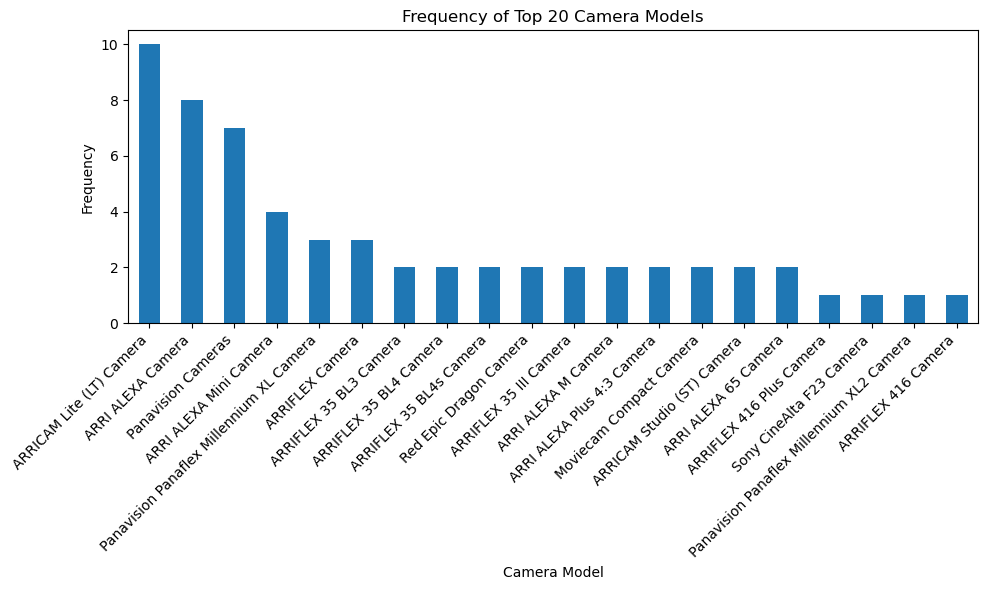

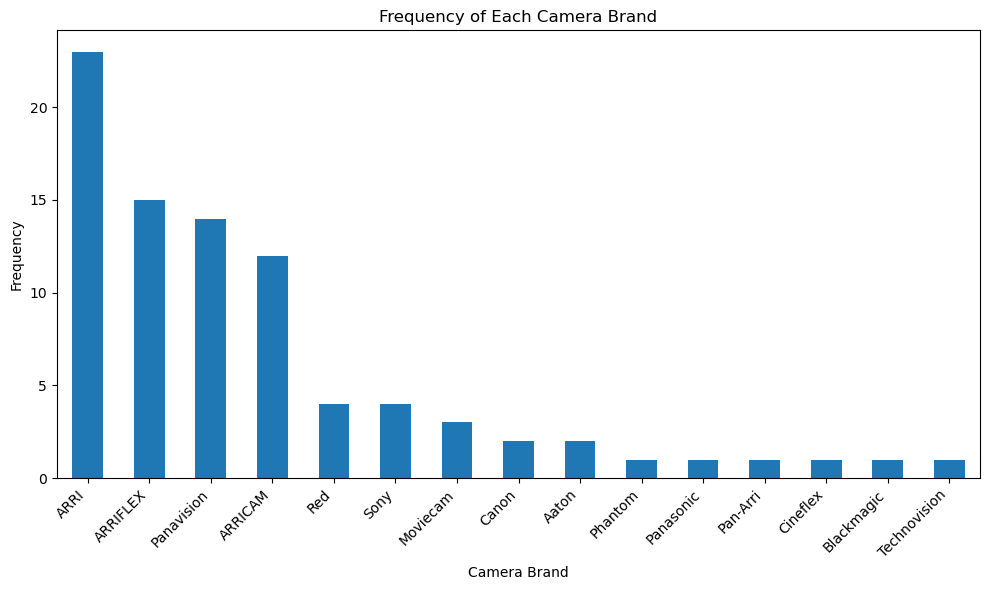

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = 'Master'
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films_with_camera_brand.csv"))

model_counts = festivals_attended_by_films_df['Camera'].value_counts()
top_20_models = model_counts.head(20)

plt.figure(figsize=(10, 6))
top_20_models.plot(kind='bar')
plt.title('Frequency of Top 20 Camera Models')
plt.xlabel('Camera Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(folder_path, "top_20_camera_models_frequency.png"))

brand_counts = festivals_attended_by_films_df['Camera Brand'].value_counts()

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Frequency of Each Camera Brand')
plt.xlabel('Camera Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(folder_path, "camera_brand_frequency.png"))

plt.show()

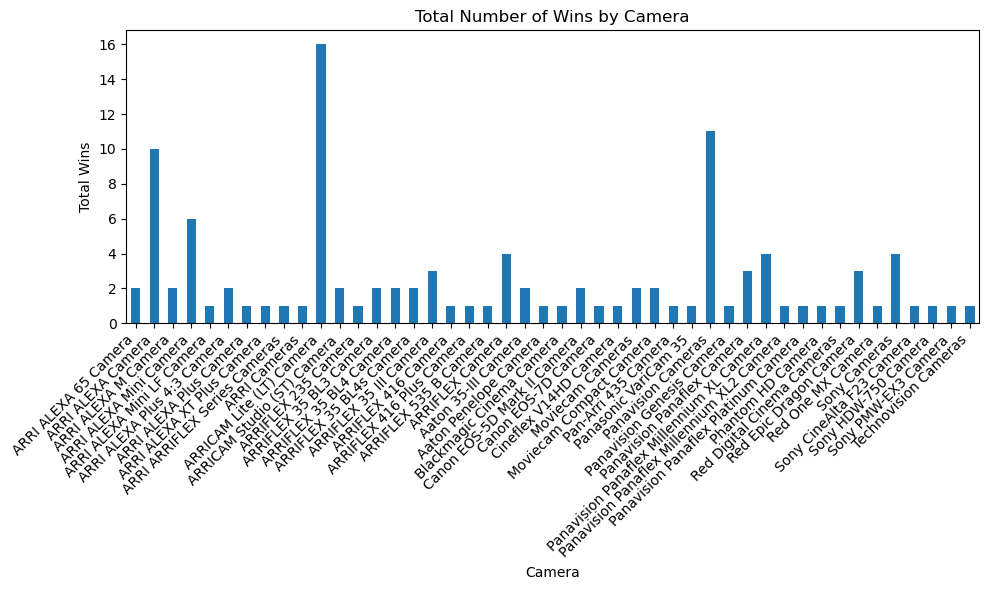

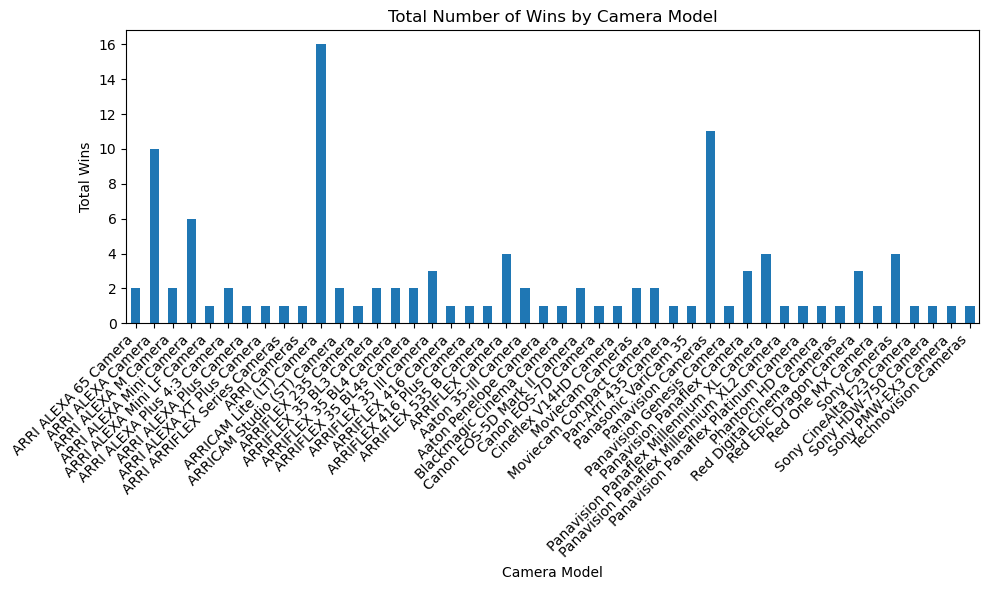

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = 'Master'
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films_with_camera_brand.csv"))

camera_wins_counts = festivals_attended_by_films_df.groupby('Camera')['NumCategories'].sum()

plt.figure(figsize=(10, 6))
camera_wins_counts.plot(kind='bar')
plt.title('Total Number of Wins by Camera')
plt.xlabel('Camera')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(folder_path, "total_wins_by_camera.png"))
plt.show()

festivals_attended_by_films_df['Camera Model'] = festivals_attended_by_films_df['Camera'].str.split(',').str[0]
camera_model_wins_counts = festivals_attended_by_films_df.groupby('Camera Model')['NumCategories'].sum()

plt.figure(figsize=(10, 6))
camera_model_wins_counts.plot(kind='bar')
plt.title('Total Number of Wins by Camera Model')
plt.xlabel('Camera Model')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(folder_path, "total_wins_by_camera_model.png"))
plt.show()

In [29]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=bafta_best_film"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'
response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=bafta_'
categories = [link.replace(prefix, '') for link in links]
print(categories)

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=bafta_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})
    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []

    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])

    return winners

with open('BAFTA_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_film', 'british_film', 'best_director', 'best_leading_actor', 'best_leading_actress', 'best_british_actor', 'best_british_actress', 'best_foreign_actor', 'best_foreign_actress', 'best_supporting_actor', 'best_supporting_actress', 'best_casting', 'best_supp_artist', 'most_outstanding_newcomer_to_film', 'best_screenplay', 'best_original_screenplay', 'best_adapted_screenplay', 'best_british_screenplay', 'best_cinematographer', 'best_cinematography_color', 'best_cinematography_bw', 'best_editing', 'best_music', 'best_original_song', 'best_art_direction', 'best_art_direction_color', 'best_art_direction_bw', 'best_production_design', 'best_costume_design', 'best_makeup_hair', 'best_sound', 'best_visual_effects', 'best_foreign_film', 'best_animated_film', 'best_animation', 'best_documentary', 'best_short', 'best_short_animation', 'asquith_award', 'best_british_debut', 'best_tv_drama', 'best_tv_situation_comedy', 'best_tv_international', 'best_tv_mini_series', 'best_single_drama', 'best

In [30]:
import pandas as pd

file_name = 'BAFTA_film_affinity_winners.csv'
df = pd.read_csv(file_name)

df_filtered = df[df['Year'] >= 1980]

output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)

print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_BAFTA_film_affinity_winners.csv'.


In [39]:
import pandas as pd

file_name = 'filtered_BAFTA_film_affinity_winners.csv'
df = pd.read_csv(file_name)

grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()

grouped['Festival'] = 'BAFTA'
grouped['NumCategories'] = grouped['Category'].apply(len)
grouped['City'] = 'London'
grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)
grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]

output_file_name = 'BAFTA_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)

print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'BAFTA_film_affinity_winners_final.csv'.


In [37]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_best_picture"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'

response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_'
categories = [link.replace(prefix, '') for link in links]

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=academy_awards_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})
    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []

    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])

    return winners

with open('oscars_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_picture', 'best_director', 'best_leading_actress', 'best_leading_actor', 'best_supporting_actor', 'best_supporting_actress', 'best_unique_artistic', 'best_foreign_film', 'best_original_screenplay', 'best_adapted_screenplay', 'best_screenplay', 'best_story', 'best_story_screenplay', 'best_title_writing', 'best_editing', 'best_cinematography', 'best_cinematography_color', 'best_cinematography_bw', 'best_score', 'best_drama_score', 'best_comedy_score', 'best_score_adapted', 'best_score_drama_comedy', 'best_score_musical', 'best_song', 'best_song_score', 'best_assistant_director', 'best_art_direction', 'best_art_direction_color', 'best_art_direction_bw', 'best_dance_direction', 'best_costume_design', 'best_costume_design_color', 'best_costume_design_bw', 'best_makeup', 'best_sound_mixing', 'best_sound_editing', 'best_visual_effects', 'best_special_effects', 'best_engineering_effects', 'best_animated_feature', 'best_short_film_animated', 'best_documentary_feature', 'best_short_film_d

In [38]:
import pandas as pd

file_name = 'oscars_film_affinity_winners.csv'
df = pd.read_csv(file_name)
df_filtered = df[df['Year'] >= 1980]
output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)
print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_oscars_film_affinity_winners.csv'.


In [40]:
import pandas as pd

file_name = 'filtered_oscars_film_affinity_winners.csv'
df = pd.read_csv(file_name)
grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()
grouped['Festival'] = 'Academy'
grouped['NumCategories'] = grouped['Category'].apply(len)
grouped['City'] = 'Los Angeles'
grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)
grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]
output_file_name = 'oscars_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)
print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'oscars_film_affinity_winners_final.csv'.


In [41]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=cesar_best_film"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'
response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=cesar_'
categories = [link.replace(prefix, '') for link in links]

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=cesar_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})

    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []

    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])

    return winners

with open('cesar_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])

    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_film', 'best_director', 'best_actor', 'best_actress', 'best_supporting_actor', 'best_supporting_actress', 'best_promising_actor', 'best_promising_actress', 'best_screenplay', 'best_original_screenplay', 'best_adapted_screenplay', 'best_cinematography', 'best_editing', 'best_music', 'best_production_design', 'best_visual_effects', 'best_costume_design', 'best_sound', 'best_first_work', 'best_foreign_film', 'best_francophone_film', 'best_european_film', 'best_animated_film', 'best_documentary', 'best_short_film', 'best_animated_short_film', 'best_short_documentary', 'best_poster', 'cesar_des_lyceens', 'audience_award', 'honorary_cesar']


In [42]:
import pandas as pd

file_name = 'cesar_film_affinity_winners.csv'
df = pd.read_csv(file_name)
df_filtered = df[df['Year'] >= 1980]
output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)
print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_cesar_film_affinity_winners.csv'.


In [43]:
import pandas as pd

file_name = 'filtered_cesar_film_affinity_winners.csv'
df = pd.read_csv(file_name)

grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()

grouped['Festival'] = 'Cesar'
grouped['NumCategories'] = grouped['Category'].apply(len)
grouped['City'] = 'Cesar'
grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)
grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]

output_file_name = 'cesar_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)

print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'cesar_film_affinity_winners_final.csv'.


In [44]:
import pandas as pd

file_name = 'donatello_film_affinity_winners.csv'
df = pd.read_csv(file_name)

df_filtered = df[df['Year'] >= 1980]

output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)

print(f"Filtered data saved to '{output_file_name}'.")

['best_film', 'best_director', 'best_foreign_director', 'best_european_film', 'best_foreign_film', 'best_actor', 'best_actress', 'best_foreign_actor', 'best_foreign_actress', 'best_supporting_actor', 'best_supporting_actress', 'best_screenplay', 'best_foreign_screenplay', 'best_adapted_screenplay', 'best_cinematography', 'best_editing', 'best_music', 'best_foreign_music', 'best_original_song', 'best_visual_effects', 'best_sound', 'best_costume_design', 'best_producer', 'best_foreign_producer', 'best_make_up', 'best_production_design', 'best_hair_design', 'best_new_director', 'best_new_actor', 'best_new_actress', 'critics_award', 'best_documentary', 'audience_award', 'david_youth_award', 'golden_plate', 'best_short_film', 'david_giovani_award', 'rené_clair_award', 'special_david']
Error fetching URL for category rené_clair_award: 404 Client Error: Not Found for url: https://www.filmaffinity.com/ca/awards-history.php?cat-id=donatello_ren%C3%A9_clair_award


In [45]:
import pandas as pd

file_name = 'donatello_film_affinity_winners.csv'
df = pd.read_csv(file_name)

df_filtered = df[df['Year'] >= 1980]

output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)

print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_donatello_film_affinity_winners.csv'.


In [46]:
import pandas as pd

file_name = 'filtered_donatello_film_affinity_winners.csv'
df = pd.read_csv(file_name)

grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()

grouped['Festival'] = 'Donatello'
grouped['NumCategories'] = grouped['Category'].apply(len)
grouped['City'] = 'Rome'

grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)

grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]

output_file_name = 'donatello_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)

print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'donatello_film_affinity_winners_final.csv'.


In [47]:
import requests
from bs4 import BeautifulSoup
import csv
from lxml import html

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=gotham_best_feature"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'

response = requests.get(url)
tree = html.fromstring(response.content)
ul_element = tree.xpath(xpath)[0]
links = [a.attrib['href'] for a in ul_element.xpath('.//a')]
prefix = 'https://www.filmaffinity.com/ca/awards-history.php?cat-id=gotham_'
categories = [link.replace(prefix, '') for link in links]

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=gotham_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})
    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []

    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year_elem = item.find('div', {'class': 'year'})
        movie_title_elem = item.find('span', {'class': 'movie-title-link'})
        director_elem = item.find('div', {'class': 'director'})
        cast_elem = item.find('div', {'class': 'cast'})
        
        if year_elem and movie_title_elem and director_elem and cast_elem:
            year = year_elem.text.strip()
            movie_title = movie_title_elem.text.strip()
            director = director_elem.text.strip()
            cast = cast_elem.text.strip()
            winners.append([year, movie_title, director, cast])

    return winners

with open('gotham_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])

    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])


['best_feature', 'breakthrough_director', 'best_actor', 'best_actress', 'best_lead_performance', 'best_supporting_performance', 'breakthrough_actor', 'best_ensemble_cast', 'best_screenplay', 'best_international_feature', 'best_documentary', 'special_jury_award', 'best_film_not_playing_at_a_theather_near', 'audience_award', 'series_long_form', 'series_short_form', 'nonfiction_series', 'performance_new_series']


In [48]:
import pandas as pd

file_name = 'gotham_film_affinity_winners.csv'
df = pd.read_csv(file_name)
df_filtered = df[df['Year'] >= 1980]
output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)
print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_gotham_film_affinity_winners.csv'.


In [49]:
import pandas as pd

file_name = 'filtered_gotham_film_affinity_winners.csv'
df = pd.read_csv(file_name)

grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()

grouped['Festival'] = 'Gothem'
grouped['NumCategories'] = grouped['Category'].apply(len)
grouped['City'] = 'New York City'
grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)
grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]

output_file_name = 'gotham_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)

print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'gotham_film_affinity_winners_final.csv'.


In [50]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.filmaffinity.com/ca/awards-history.php?cat-id=satellite_best_picture"
xpath = '//*[@id="mt-content-cell"]/div[2]/div[2]/div[2]/div[2]/ul'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
ul_element = soup.find(xpath)

links = [a['href'].replace('https://www.filmaffinity.com/ca/awards-history.php?cat-id=satellite_', '') for a in ul_element.find_all('a')]

def scrape_winners(cat_id):
    url = f"https://www.filmaffinity.com/ca/awards-history.php?cat-id=satellite_{cat_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for category {cat_id}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    wrapper = soup.find('div', {'class': 'wrapper'})

    if wrapper is None:
        print(f"Error: Couldn't find a wrapper with class 'wrapper' for category {cat_id}")
        return []

    list_items = wrapper.find_all('li', class_=lambda x: x != 'empty-box')
    winners = []
    for item in list_items:
        year = item.find('div', {'class': 'year'}).text.strip()
        movie_title = item.find('span', {'class': 'movie-title-link'}).text.strip()
        director = item.find('div', {'class': 'director'}).text.strip()
        cast = item.find('div', {'class': 'cast'}).text.strip()
        winners.append([year, movie_title, director, cast])
    return winners

with open('satellite_film_affinity_winners.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Category', 'Year', 'Movie Title', 'Director', 'Cast'])
    for cat_id in categories:
        winners = scrape_winners(cat_id)
        for winner in winners:
            writer.writerow([cat_id.capitalize().replace("_", " "), *winner])

['best_film', 'best_picture', 'best_comedy', 'best_independent_film', 'best_director', 'best_actor_drama', 'best_actor', 'best_actress', 'best_actress_drama', 'best_actor_comedy', 'best_actress_comedy', 'best_supporting_actor', 'best_supporting_actor_drama', 'best_supporting_actor_comedy', 'best_supporting_actress', 'best_supporting_actress_comedy', 'best_supporting_actress_drama', 'best_screenplay_original', 'best_screenplay_adapted', 'best_cinematography', 'best_editing', 'best_score', 'best_song', 'best_art_direction', 'best_costume_design', 'best_sound_mixing', 'best_visual_effects', 'best_ensemble', 'best_first_film', 'best_foreign_film', 'best_animated_feature', 'best_documentary_feature', 'auteur_award', 'best_tv_series_drama', 'best_tv_series_genre', 'best_actor_tv_series_drama', 'best_actress_tv_series_drama', 'best_supporting_actor_series_tv_drama', 'best_supporting_actress_series_tv_drama', 'best_tv_series_comedy', 'best_actor_tv_series_comedy', 'best_actress_tv_series_comed

In [51]:
import pandas as pd

file_name = 'satellite_film_affinity_winners.csv'
df = pd.read_csv(file_name)

df_filtered = df[df['Year'] >= 1980]

output_file_name = 'filtered_' + file_name
df_filtered.to_csv(output_file_name, index=False)

print(f"Filtered data saved to '{output_file_name}'.")

Filtered data saved to 'filtered_satellite_film_affinity_winners.csv'.


In [52]:
import pandas as pd

file_name = 'filtered_satellite_film_affinity_winners.csv'
df = pd.read_csv(file_name)

grouped = df.groupby(['Movie Title', 'Year', 'Director']).agg({
    'Cast': 'first',
    'Category': lambda x: list(x)
}).reset_index()

grouped['Festival'] = 'Satellite'

grouped['NumCategories'] = grouped['Category'].apply(len)

grouped['City'] = 'Los Angeles'

grouped.rename(columns={'Movie Title': 'Name'}, inplace=True)

grouped = grouped[['Name', 'Year', 'Director', 'Cast', 'Festival', 'Category', 'NumCategories', 'City']]

output_file_name = 'satellite_film_affinity_winners_final.csv'
grouped.to_csv(output_file_name, index=False)

print(f"Movie summary saved to '{output_file_name}'.")

Movie summary saved to 'satellite_film_affinity_winners_final.csv'.


In [55]:
import os
import pandas as pd

folder_path = 'Awards Scraps'
file_names = [
    'BAFTA_film_affinity_winners_final.csv',
    'oscars_film_affinity_winners_final.csv',
    'cesar_film_affinity_winners_final.csv',
    'donatello_film_affinity_winners_final.csv',
    'gotham_film_affinity_winners_final.csv',
    'satellite_film_affinity_winners_final.csv'
]

dfs = []

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs)

master_df = combined_df.groupby('Name').agg({
    'Year': 'first',
    'Cast': 'first',
    'Festival': lambda x: list(x),
    'Category': lambda x: list(x),
    'NumCategories': 'sum',
    'City': lambda x: list(x)
}).reset_index()

master_file_name = 'master_award_winners.csv'
master_df.to_csv(master_file_name, index=False)

print(f"Master file saved to '{master_file_name}'.")

Master file saved to 'master_award_winners.csv'.


In [63]:
import pandas as pd

master_df = pd.read_csv('master_award_winners.csv')
camera_df = pd.read_csv('camera_movies.csv')

master_df['Camera'] = camera_df['Primary Camera']

master_file_name = 'master_award_winners_with_camera.csv'
master_df.to_csv(master_file_name, index=False)

print(f"Updated master file with camera information saved to '{master_file_name}'.")

Updated master file with camera information saved to 'master_award_winners_with_camera.csv'.


In [64]:
import pandas as pd

merged_df = pd.read_csv('master_award_winners_with_camera.csv')

filtered_df = merged_df.dropna(subset=['Camera'])

filtered_file_name = 'master_award_winners_with_camera_filtered.csv'
filtered_df.to_csv(filtered_file_name, index=False)

print(f"Filtered file saved to '{filtered_file_name}' with rows containing empty camera fields removed.")

Filtered file saved to 'master_award_winners_with_camera_filtered.csv' with rows containing empty camera fields removed.


In [66]:
import pandas as pd

filtered_df = pd.read_csv('master_award_winners_with_camera_filtered.csv')

def extract_camera_brand(camera_name):
    return camera_name.split()[0]

filtered_df['Camera Model'] = filtered_df['Camera'].apply(extract_camera_brand)

updated_file_name = 'master_award_winners_with_camera_final.csv'
filtered_df.to_csv(updated_file_name, index=False)

print(f"Updated file saved to '{updated_file_name}' with the Camera Model column added.")

Updated file saved to 'master_award_winners_with_camera_final.csv' with the Camera Model column added.


In [69]:
import pandas as pd

final_df = pd.read_csv('Awards Scraps/master_award_winners_with_camera_final.csv')

camera_data = final_df.groupby(['Camera', 'Camera Model']).agg({'NumCategories': ['count', 'sum']}).reset_index()
camera_data.columns = ['Camera', 'Camera Model', 'Frequency', 'Total Wins']

camera_file_name = 'awards_camera_data.csv'
camera_data.to_csv(camera_file_name, index=False)

print(f"Camera data saved to '{camera_file_name}'.")

Camera data saved to 'awards_camera_data.csv'.


<Figure size 1200x600 with 0 Axes>

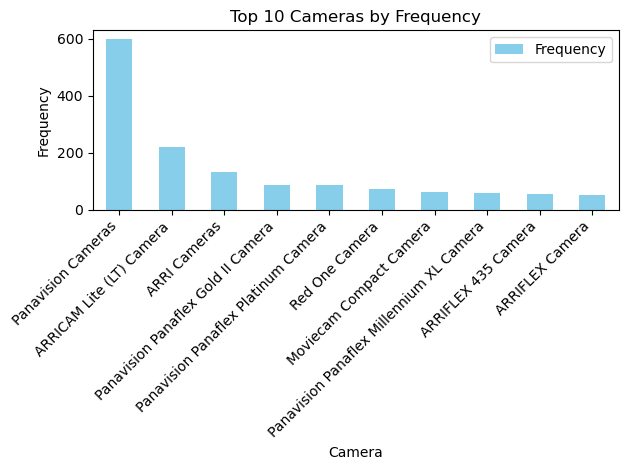

<Figure size 1200x600 with 0 Axes>

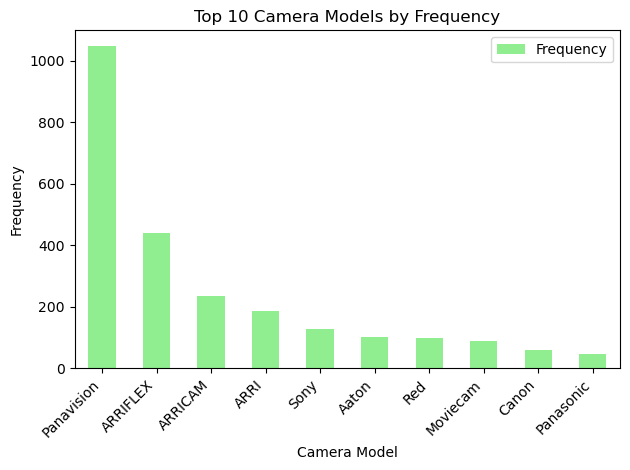

<Figure size 1200x600 with 0 Axes>

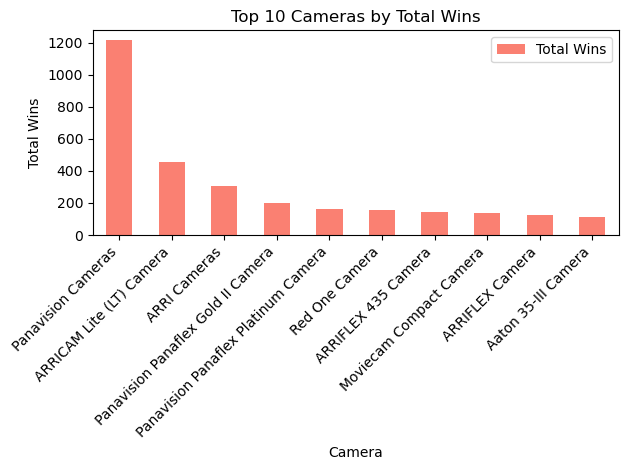

<Figure size 1200x600 with 0 Axes>

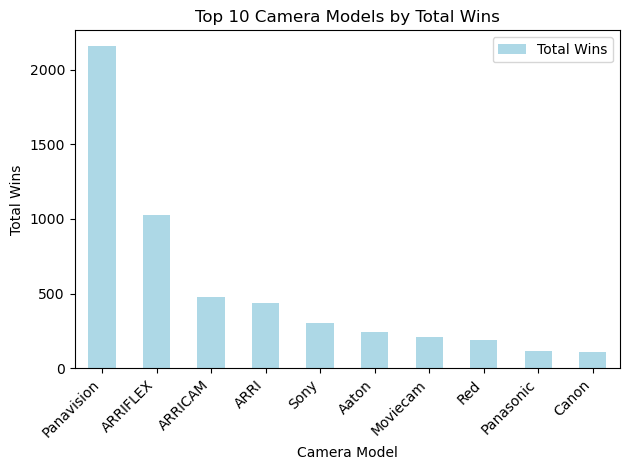

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

camera_data = pd.read_csv('awards_camera_data.csv')
camera_model_data = camera_data.groupby('Camera Model').agg({'Frequency': 'sum', 'Total Wins': 'sum'}).reset_index()

top_10_camera_models_freq = camera_model_data.nlargest(10, 'Frequency')
top_10_camera_models_wins = camera_model_data.nlargest(10, 'Total Wins')

plt.figure(figsize=(12, 6))
top_10_cameras = camera_data.groupby('Camera').agg({'Frequency': 'sum'}).nlargest(10, 'Frequency')
top_10_cameras.plot(kind='bar', y='Frequency', color='skyblue')
plt.title('Top 10 Cameras by Frequency')
plt.xlabel('Camera')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_cameras_frequency.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_camera_models_freq.plot(kind='bar', x='Camera Model', y='Frequency', color='lightgreen')
plt.title('Top 10 Camera Models by Frequency')
plt.xlabel('Camera Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_camera_models_frequency.png')
plt.show()

top_10_cameras_wins = camera_data.groupby('Camera').agg({'Total Wins': 'sum'}).nlargest(10, 'Total Wins')
top_10_camera_models_wins = camera_model_data.nlargest(10, 'Total Wins')

plt.figure(figsize=(12, 6))
top_10_cameras_wins.plot(kind='bar', y='Total Wins', color='salmon')
plt.title('Top 10 Cameras by Total Wins')
plt.xlabel('Camera')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_cameras_total_wins.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_camera_models_wins.plot(kind='bar', x='Camera Model', y='Total Wins', color='lightblue')
plt.title('Top 10 Camera Models by Total Wins')
plt.xlabel('Camera Model')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_camera_models_total_wins.png')
plt.show()


In [83]:
import pandas as pd
import os

folder_path = 'Master'
festivals_attended_by_films_df = pd.read_csv(os.path.join(folder_path, "festivals_attended_by_films_with_camera_brand.csv"))
festivals_attended_by_films_df['Camera Model'] = festivals_attended_by_films_df['Camera'].str.split(',').str[0]
camera_info_df = festivals_attended_by_films_df.groupby(['Camera', 'Camera Model']).agg({'NumCategories': ['count', 'sum']}).reset_index()
camera_info_df.columns = ['Camera', 'Camera Model', 'Frequency', 'Total Wins']
output_file_path = os.path.join(folder_path, "festivals_camera_data.csv")
camera_info_df.to_csv(output_file_path, index=False)
print("Unique list of cameras saved successfully as 'festivals_camera_data.csv'.")

Unique list of cameras saved successfully as 'festivals_camera_data.csv'.


<Figure size 1200x600 with 0 Axes>

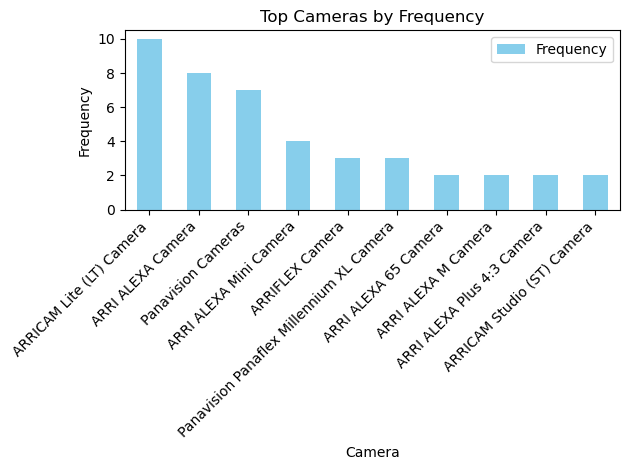

<Figure size 1200x600 with 0 Axes>

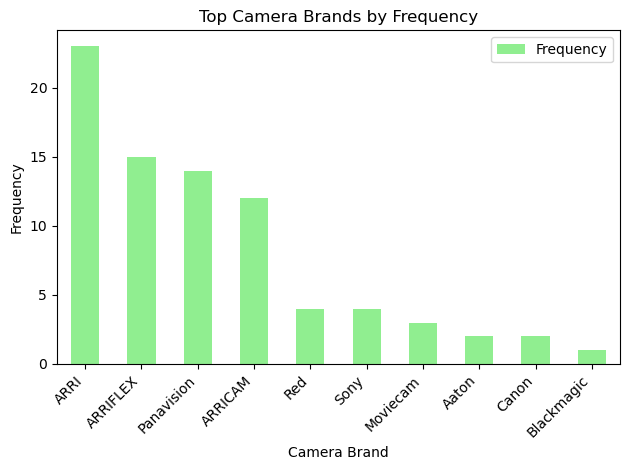

<Figure size 1200x600 with 0 Axes>

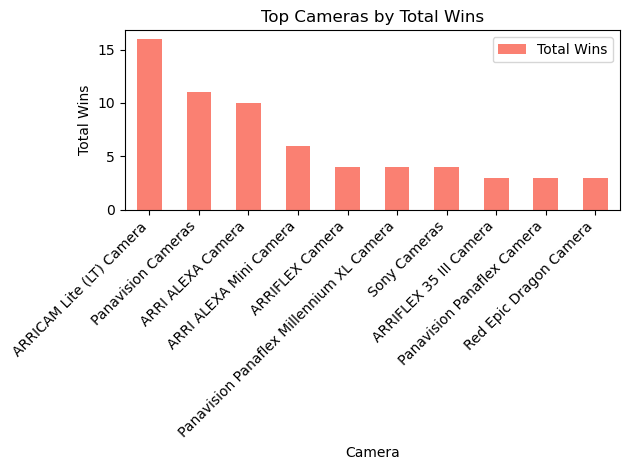

<Figure size 1200x600 with 0 Axes>

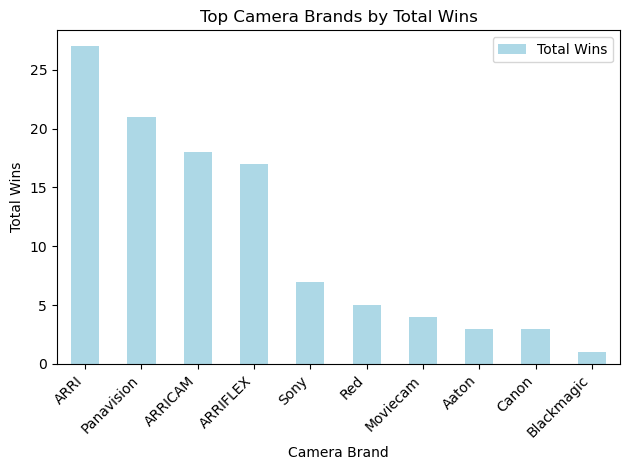

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

camera_data = pd.read_csv('Master/festivals_camera_data.csv')
camera_brand_data = camera_data.groupby('Camera').agg({'Frequency': 'sum', 'Total Wins': 'sum'}).reset_index()
camera_brand_data['Camera Brand'] = camera_brand_data['Camera'].apply(lambda x: x.split()[0])
camera_brand_data_grouped = camera_brand_data.groupby('Camera Brand').agg({'Frequency': 'sum', 'Total Wins': 'sum'}).reset_index()
top_10_cameras_freq = camera_brand_data.nlargest(10, 'Frequency')
top_10_cameras_wins = camera_brand_data.nlargest(10, 'Total Wins')
top_10_camera_brands_freq = camera_brand_data_grouped.nlargest(10, 'Frequency')
top_10_camera_brands_wins = camera_brand_data_grouped.nlargest(10, 'Total Wins')

plt.figure(figsize=(12, 6))
top_10_cameras_freq.plot(kind='bar', x='Camera', y='Frequency', color='skyblue')
plt.title('Top Cameras by Frequency')
plt.xlabel('Camera')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_cameras_frequency.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_camera_brands_freq.plot(kind='bar', x='Camera Brand', y='Frequency', color='lightgreen')
plt.title('Top Camera Brands by Frequency')
plt.xlabel('Camera Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_camera_brands_frequency.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_cameras_wins.plot(kind='bar', x='Camera', y='Total Wins', color='salmon')
plt.title('Top Cameras by Total Wins')
plt.xlabel('Camera')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_cameras_total_wins.png')
plt.show()

plt.figure(figsize=(12, 6))
top_10_camera_brands_wins.plot(kind='bar', x='Camera Brand', y='Total Wins', color='lightblue')
plt.title('Top Camera Brands by Total Wins')
plt.xlabel('Camera Brand')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_camera_brands_total_wins.png')
plt.show()